In [41]:
import math
import cv2
import pytesseract
import matplotlib.pyplot as plt
import argos_translate

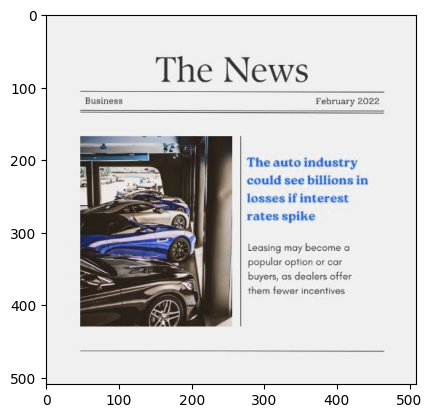

In [42]:
image = cv2.imread('ocrtest.jpg')
plt.imshow(image)

In [43]:
ocr_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
for i in ocr_data:
    print(i,ocr_data[i])

level [1, 2, 3, 4, 5, 5, 2, 3, 4, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 2, 3, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5]
page_num [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
block_num [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10]
par_num [0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
line_num [0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0

In [44]:
def find_sentence(ocr_data: dict, threshold:int=50) -> dict:
    result = dict()
    result['text'] = []
    result['left'] = []
    result['top'] = []
    result['width'] = []
    result['height'] = []

    sentence_string = ''
    sentence_left = -1
    sentence_top = -1
    sentence_width = -1
    sentence_height = -1

    for i in range(len(ocr_data['text'])):
        lv = ocr_data['level'][i]
        x = ocr_data['left'][i]
        y = ocr_data['top'][i]
        w = ocr_data['width'][i]
        h = ocr_data['height'][i]

        conf = int(ocr_data['conf'][i])
        text = ocr_data['text'][i]
        text = text.strip()

        if lv == 4:
            if len(sentence_string.strip()) > 1:
                result['text'].append(sentence_string.strip())
                result['left'].append(sentence_left)
                result['top'].append(sentence_top)
                result['width'].append(sentence_width)
                result['height'].append(sentence_height)

                sentence_string = ''
                sentence_left = -1
                sentence_top = -1
                sentence_width = -1
                sentence_height = -1

        elif lv == 5:
            if conf > threshold and len(text) > 0:
                if sentence_left != -1 and sentence_left+sentence_width+w < x:
                    result['text'].append(sentence_string.strip())
                    result['left'].append(sentence_left)
                    result['top'].append(sentence_top)
                    result['width'].append(sentence_width)
                    result['height'].append(sentence_height)

                    sentence_string = ''
                    sentence_left = -1
                    sentence_top = -1
                    sentence_width = -1
                    sentence_height = -1

                    sentence_string += ' ' + text
                    sentence_left = x if sentence_left==-1 else min(sentence_left, x)
                    sentence_top = y if sentence_top==-1 else min(sentence_top, y)
                    sentence_width = w if sentence_width==-1 else max(sentence_left+sentence_width, x+w)-sentence_left
                    sentence_height = h if sentence_height==-1 else max(sentence_height, h)

                else:
                    sentence_string += ' ' + text
                    sentence_left = x if sentence_left==-1 else min(sentence_left, x)
                    sentence_top = y if sentence_top==-1 else min(sentence_top, y)
                    sentence_width = w if sentence_width==-1 else max(sentence_left+sentence_width, x+w)-sentence_left
                    sentence_height = h if sentence_height==-1 else max(sentence_height, h)

    if len(sentence_string.strip()) > 1:
        result['text'].append(sentence_string.strip())
        result['left'].append(sentence_left)
        result['top'].append(sentence_top)
        result['width'].append(sentence_width)
        result['height'].append(sentence_height)

    return result

In [45]:
sentence_data = find_sentence(ocr_data)
for i in sentence_data:
    print(i,sentence_data[i])

text ['The News', 'Business', 'February 2022', 'The auto industry', 'could see billions in', 'losses if interest', 'rates spike', 'Leasing may become a', 'popular option or car', 'buyers, as dealers offer', 'them fewer incentives']
left [151, 54, 372, 276, 276, 277, 277, 278, 278, 278, 278]
top [58, 115, 115, 197, 222, 247, 271, 315, 335, 355, 375]
width [209, 51, 86, 152, 166, 139, 93, 139, 129, 142, 133]
height [36, 9, 12, 17, 13, 12, 16, 12, 13, 14, 11]


In [46]:
def calculate_distance(x1: int, y1: int, x2: int, y2: int) -> float:
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def find_paragraph(sentence_data: dict, threshold:float=1.5) -> dict:
    result = dict()
    result['text'] = []
    result['left'] = []
    result['top'] = []
    result['width'] = []
    result['height'] = []
    result['line'] = []
    result['lpos'] = []

    if len(sentence_data['text']) < 1:
        return result
    
    block_string = sentence_data['text'][0]
    block_left = sentence_data['left'][0]
    block_top = sentence_data['top'][0]
    block_width = sentence_data['width'][0]
    block_height = sentence_data['height'][0]
    line = 1
    line_pos = [(block_left, block_top, block_width, block_height)]
    base_height = block_height

    for i in range(1, len(sentence_data['text'])):
        text = sentence_data['text'][i]
        x = sentence_data['left'][i]
        y = sentence_data['top'][i]
        w = sentence_data['width'][i]
        h = sentence_data['height'][i]

        distance = calculate_distance(block_left, block_top+block_height, x,y)

        if h*threshold < base_height or distance > base_height*threshold:
            result['text'].append(block_string)
            result['left'].append(block_left)
            result['top'].append(block_top)
            result['width'].append(block_width)
            result['height'].append(block_height)
            result['line'].append(line)
            result['lpos'].append(line_pos)

            block_string = text
            block_left = x
            block_top = y
            block_width = w
            block_height = h
            line = 1
            line_pos = [(block_left, block_top, block_width, block_height)]
            base_height = h

        else:
            block_string += ' ' + text
            block_left = min(block_left, x)
            block_width = max(block_left+block_width, x+w)-block_left
            block_height = max(block_top+block_height, y+h)-block_top
            line += 1
            line_pos.append((x, y, w, h))

    result['text'].append(block_string)
    result['left'].append(block_left)
    result['top'].append(block_top)
    result['width'].append(block_width)
    result['height'].append(block_height)
    result['line'].append(line)
    result['lpos'].append(line_pos)
    
    return result

In [47]:
paragraph_data = find_paragraph(sentence_data)
for i in paragraph_data:
    print(i,paragraph_data[i])

text ['The News', 'Business', 'February 2022', 'The auto industry could see billions in losses if interest rates spike', 'Leasing may become a popular option or car buyers, as dealers offer them fewer incentives']
left [151, 54, 372, 276, 278]
top [58, 115, 115, 197, 315]
width [209, 51, 86, 166, 142]
height [36, 9, 12, 90, 71]
line [1, 1, 1, 4, 4]
lpos [[(151, 58, 209, 36)], [(54, 115, 51, 9)], [(372, 115, 86, 12)], [(276, 197, 152, 17), (276, 222, 166, 13), (277, 247, 139, 12), (277, 271, 93, 16)], [(278, 315, 139, 12), (278, 335, 129, 13), (278, 355, 142, 14), (278, 375, 133, 11)]]


In [48]:
script_text = []
for i in range(len(paragraph_data['text'])):
    script_text.append(paragraph_data['text'][i])
print(script_text)

['The News', 'Business', 'February 2022', 'The auto industry could see billions in losses if interest rates spike', 'Leasing may become a popular option or car buyers, as dealers offer them fewer incentives']


In [49]:
translated_script_text = []
for i in script_text:
    translated_script_text.append(argos_translate.text_translate(text=i, dest='ko', src='en'))
print(translated_script_text)

['뉴스', '주요사업', '2월 2022', '자동차 산업은 이자율이 스파이크면 수십억 달러를 볼 수 있습니다.', 'Leasing는 대중적인 선택권이 될지도 모릅니다 또는 자동차 구매자는, 상인으로 그들 몇몇 인센티브를 제안합니다']


In [50]:
def make_script(script_list):
    script = ''
    for text in script_list:
        script += text + '. '
    return script

In [51]:
script = make_script(script_text)
trans_script = make_script(translated_script_text)
print(script)
print(trans_script)

The News. Business. February 2022. The auto industry could see billions in losses if interest rates spike. Leasing may become a popular option or car buyers, as dealers offer them fewer incentives. 
뉴스. 주요사업. 2월 2022. 자동차 산업은 이자율이 스파이크면 수십억 달러를 볼 수 있습니다.. Leasing는 대중적인 선택권이 될지도 모릅니다 또는 자동차 구매자는, 상인으로 그들 몇몇 인센티브를 제안합니다. 
